In [28]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

df = pd.read_excel("Round 1 Data FCB.xlsx")
dfb = pd.read_excel("Round 1 Data FCRR.XLSX")
df.head()

X=[]
Y = [float(x)/float(np.max(df["Demand"])) for x in df["Demand"]]

for index,i in df.iterrows():
    if index>732:
        pass
    l = []
    l.append(i["Temp"]/np.max(df["Temp"]))
    l.append(i["Wind_Speed"]/np.max(df["Wind_Speed"]))
    l.append(i["Precip_Amount"]/np.max(df["Precip_Amount"]))
    l.append(i["Chill"]/np.max(df["Chill"]))
    l.append(i["Solar_Rad"]/np.max(df["Solar_Rad"]))
    l.append(i["Humidity"]/np.max(df["Humidity"]))
    l.append(i["Cloud_Cover"]/np.max(df["Cloud_Cover"]))
    #l.append(i["Date"].month)
    X.append(l)
    
X_real=[]
for index,i in dfb.iterrows():
    l = []
    l.append(i["Temp"]/np.max(df["Temp"]))
    l.append(i["Wind_Speed"]/np.max(df["Wind_Speed"]))
    l.append(i["Precip_Amount"]/np.max(df["Precip_Amount"]))
    l.append(i["Chill"]/np.max(df["Chill"]))
    l.append(i["Solar_Rad"]/np.max(df["Solar_Rad"]))
    l.append(i["Humidity"]/np.max(df["Humidity"]))
    l.append(i["Cloud_Cover"]/np.max(df["Cloud_Cover"]))
    #l.append(i["Date"].month)
    X_real.append(l)

X_valid = X[-56:-1]
Y_result = Y[-56:-1]



#Remove the last 55 points from the traingin set
X_train=X[:-55]
Y_train=Y[:-55]
print("{0},{1}, PredictionSet {2}".format(len(X),len(Y),len(X_valid)))


[[0.48075366415073806, 0.30173292558613662, 0.012461058549621439, 0.16237114293622709, 0.31604259704568871, 0.84114583333333326, 0.46171874304612476]]
732,732, PredictionSet 55


In [29]:
#scaler = StandardScaler()
#scaler.fit(X_train)  # Don't cheat - fit only on training data
#X_train = scaler.transform(X_train)
#X_valid = scaler.transform(X_valid) 




##define base model
def base_model():
     model = Sequential()
     model.add(Dense(12, input_dim=len(X_train[0]), activation='linear'))
     for i in range(1):
        model.add(Dense(7, activation='linear'))

     model.add(Dense(1))
     sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
     adam=   keras.optimizers.Adam(lr=10, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
     rms = keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
     model.compile(loss='mean_squared_error', optimizer = rms,metrics=['mape',"mae"])
     return model

seed = 7
np.random.seed(seed)

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=2000)
#clf = KerasRegressor(build_fn=base_model, batch_size=2,verbose=True,epochs=20)
clf = base_model()
clf.fit(X_train,Y_train,batch_size=512,verbose=True,epochs=5000,callbacks=[early_stopping])
#clf.evaulate(X_train,Y_train)

Epoch 1/5000
677/677 [==============================] - 0s - loss: 1.5866 - mean_absolute_percentage_error: 185.5345 - mean_absolute_error: 0.8774    
Epoch 2/5000
677/677 [==============================] - 0s - loss: 0.2642 - mean_absolute_percentage_error: 77.5320 - mean_absolute_error: 0.4355     
Epoch 3/5000
677/677 [==============================] - 0s - loss: 0.0684 - mean_absolute_percentage_error: 48.0254 - mean_absolute_error: 0.2224     
Epoch 4/5000
677/677 [==============================] - 0s - loss: 0.0613 - mean_absolute_percentage_error: 47.5857 - mean_absolute_error: 0.2116     
Epoch 5/5000
677/677 [==============================] - 0s - loss: 0.0563 - mean_absolute_percentage_error: 46.3256 - mean_absolute_error: 0.2026     
Epoch 6/5000
677/677 [==============================] - 0s - loss: 0.0521 - mean_absolute_percentage_error: 43.9487 - mean_absolute_error: 0.1943     
Epoch 7/5000
677/677 [==============================] - 0s - loss: 0.0485 - mean_absolute_perc

677/677 [==============================] - 0s - loss: 0.0115 - mean_absolute_percentage_error: 18.9679 - mean_absolute_error: 0.0873     
Epoch 55/5000
677/677 [==============================] - 0s - loss: 0.0113 - mean_absolute_percentage_error: 18.8661 - mean_absolute_error: 0.0868     
Epoch 56/5000
677/677 [==============================] - 0s - loss: 0.0113 - mean_absolute_percentage_error: 18.6110 - mean_absolute_error: 0.0864     
Epoch 57/5000
677/677 [==============================] - 0s - loss: 0.0112 - mean_absolute_percentage_error: 18.3618 - mean_absolute_error: 0.0859     
Epoch 58/5000
677/677 [==============================] - 0s - loss: 0.0111 - mean_absolute_percentage_error: 18.4322 - mean_absolute_error: 0.0856     
Epoch 59/5000
677/677 [==============================] - 0s - loss: 0.0110 - mean_absolute_percentage_error: 18.4998 - mean_absolute_error: 0.0853     
Epoch 60/5000
677/677 [==============================] - 0s - loss: 0.0109 - mean_absolute_percentage_

677/677 [==============================] - 0s - loss: 0.0086 - mean_absolute_percentage_error: 16.7342 - mean_absolute_error: 0.0756     
Epoch 106/5000
677/677 [==============================] - 0s - loss: 0.0085 - mean_absolute_percentage_error: 16.9242 - mean_absolute_error: 0.0755     
Epoch 107/5000
677/677 [==============================] - 0s - loss: 0.0085 - mean_absolute_percentage_error: 16.7033 - mean_absolute_error: 0.0754     
Epoch 108/5000
677/677 [==============================] - 0s - loss: 0.0085 - mean_absolute_percentage_error: 16.8581 - mean_absolute_error: 0.0755     
Epoch 109/5000
677/677 [==============================] - 0s - loss: 0.0086 - mean_absolute_percentage_error: 17.1292 - mean_absolute_error: 0.0756     
Epoch 110/5000
677/677 [==============================] - 0s - loss: 0.0084 - mean_absolute_percentage_error: 16.8255 - mean_absolute_error: 0.0751     
Epoch 111/5000
677/677 [==============================] - 0s - loss: 0.0084 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0079 - mean_absolute_percentage_error: 16.1638 - mean_absolute_error: 0.0725     
Epoch 158/5000
677/677 [==============================] - ETA: 0s - loss: 0.0076 - mean_absolute_percentage_error: 15.7915 - mean_absolute_error: 0.071 - 0s - loss: 0.0079 - mean_absolute_percentage_error: 16.2260 - mean_absolute_error: 0.0725     
Epoch 159/5000
677/677 [==============================] - 0s - loss: 0.0080 - mean_absolute_percentage_error: 16.2004 - mean_absolute_error: 0.0727     
Epoch 160/5000
677/677 [==============================] - 0s - loss: 0.0081 - mean_absolute_percentage_error: 16.2115 - mean_absolute_error: 0.0732     
Epoch 161/5000
677/677 [==============================] - 0s - loss: 0.0080 - mean_absolute_percentage_error: 16.1087 - mean_absolute_error: 0.0730     
Epoch 162/5000
677/677 [==============================] - 0s - loss: 0.0078 - mean_absolute_percentage_error: 16.2307 - mean_absolute_error: 0.0722     
E

677/677 [==============================] - 0s - loss: 0.0077 - mean_absolute_percentage_error: 16.1549 - mean_absolute_error: 0.0714     
Epoch 211/5000
677/677 [==============================] - 0s - loss: 0.0077 - mean_absolute_percentage_error: 16.1387 - mean_absolute_error: 0.0714     
Epoch 212/5000
677/677 [==============================] - 0s - loss: 0.0077 - mean_absolute_percentage_error: 16.1925 - mean_absolute_error: 0.0713     
Epoch 213/5000
677/677 [==============================] - 0s - loss: 0.0077 - mean_absolute_percentage_error: 16.1426 - mean_absolute_error: 0.0714     
Epoch 214/5000
677/677 [==============================] - 0s - loss: 0.0078 - mean_absolute_percentage_error: 16.0841 - mean_absolute_error: 0.0722     
Epoch 215/5000
677/677 [==============================] - 0s - loss: 0.0077 - mean_absolute_percentage_error: 15.9675 - mean_absolute_error: 0.0718     
Epoch 216/5000
677/677 [==============================] - ETA: 0s - loss: 0.0072 - mean_absolute_

677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 15.9490 - mean_absolute_error: 0.0712     
Epoch 261/5000
677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 15.9616 - mean_absolute_error: 0.0710     
Epoch 262/5000
677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 16.1899 - mean_absolute_error: 0.0710     
Epoch 263/5000
677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 15.9730 - mean_absolute_error: 0.0712     
Epoch 264/5000
677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 15.9899 - mean_absolute_error: 0.0713     
Epoch 265/5000
677/677 [==============================] - 0s - loss: 0.0077 - mean_absolute_percentage_error: 15.8805 - mean_absolute_error: 0.0715     
Epoch 266/5000
677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 16.1149 - mean_absolute_error: 0.0708     
Epoch 312/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.9461 - mean_absolute_error: 0.0707     
Epoch 313/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.9960 - mean_absolute_error: 0.0707     
Epoch 314/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 16.0047 - mean_absolute_error: 0.0707     
Epoch 315/5000
677/677 [==============================] - ETA: 0s - loss: 0.0076 - mean_absolute_percentage_error: 16.1153 - mean_absolute_error: 0.070 - 0s - loss: 0.0076 - mean_absolute_percentage_error: 15.9900 - mean_absolute_error: 0.0709     
Epoch 316/5000
677/677 [==============================] - 0s - loss: 0.0077 - mean_absolute_percentage_error: 16.2902 - mean_absolute_error: 0.0711     
E

677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.9156 - mean_absolute_error: 0.0708     
Epoch 362/5000
677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 15.9155 - mean_absolute_error: 0.0712     
Epoch 363/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.7868 - mean_absolute_error: 0.0707     
Epoch 364/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 16.0705 - mean_absolute_error: 0.0706     
Epoch 365/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.9018 - mean_absolute_error: 0.0706     
Epoch 366/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.9302 - mean_absolute_error: 0.0708     
Epoch 367/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_percentage_error: 16.3429 - mean_absolute_error: 0.0710     
Epoch 410/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.9150 - mean_absolute_error: 0.0704     
Epoch 411/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.8965 - mean_absolute_error: 0.0705     
Epoch 412/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 16.0350 - mean_absolute_error: 0.0705     
Epoch 413/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.8675 - mean_absolute_error: 0.0704     
Epoch 414/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.9099 - mean_absolute_error: 0.0706     
Epoch 415/5000
677/677 [==============================] - 0s - loss: 0.0076 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 16.0360 - mean_absolute_error: 0.0702     
Epoch 463/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.7706 - mean_absolute_error: 0.0705     
Epoch 464/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8801 - mean_absolute_error: 0.0702     
Epoch 465/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8923 - mean_absolute_error: 0.0702     
Epoch 466/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.8334 - mean_absolute_error: 0.0703     
Epoch 467/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8056 - mean_absolute_error: 0.0703     
Epoch 468/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8352 - mean_absolute_error: 0.0702     
Epoch 516/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7869 - mean_absolute_error: 0.0703     
Epoch 517/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.7732 - mean_absolute_error: 0.0704     
Epoch 518/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7788 - mean_absolute_error: 0.0704     
Epoch 519/5000
677/677 [==============================] - ETA: 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7021 - mean_absolute_error: 0.069 - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7808 - mean_absolute_error: 0.0704     
Epoch 520/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8664 - mean_absolute_error: 0.0701     
E

677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.9004 - mean_absolute_error: 0.0700     
Epoch 567/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7835 - mean_absolute_error: 0.0702     
Epoch 568/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8051 - mean_absolute_error: 0.0700     
Epoch 569/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.9037 - mean_absolute_error: 0.0700     
Epoch 570/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7295 - mean_absolute_error: 0.0704     
Epoch 571/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.9509 - mean_absolute_error: 0.0699     
Epoch 572/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7781 - mean_absolute_error: 0.0701     
Epoch 620/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8348 - mean_absolute_error: 0.0702     
Epoch 621/5000
677/677 [==============================] - 0s - loss: 0.0075 - mean_absolute_percentage_error: 15.7896 - mean_absolute_error: 0.0707     
Epoch 622/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7640 - mean_absolute_error: 0.0699     
Epoch 623/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8977 - mean_absolute_error: 0.0699     
Epoch 624/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8905 - mean_absolute_error: 0.0698     
Epoch 625/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7381 - mean_absolute_error: 0.0698     
Epoch 672/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8574 - mean_absolute_error: 0.0697     
Epoch 673/5000
677/677 [==============================] - ETA: 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.9325 - mean_absolute_error: 0.069 - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.9687 - mean_absolute_error: 0.0696     
Epoch 674/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7905 - mean_absolute_error: 0.0698     
Epoch 675/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7849 - mean_absolute_error: 0.0697     
Epoch 676/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8077 - mean_absolute_error: 0.0697     
E

677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8218 - mean_absolute_error: 0.0696     
Epoch 724/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8264 - mean_absolute_error: 0.0696     
Epoch 725/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8528 - mean_absolute_error: 0.0696     
Epoch 726/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.9160 - mean_absolute_error: 0.0695     
Epoch 727/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8018 - mean_absolute_error: 0.0696     
Epoch 728/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7891 - mean_absolute_error: 0.0696     
Epoch 729/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.9830 - mean_absolute_error: 0.0697     
Epoch 777/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8887 - mean_absolute_error: 0.0695     
Epoch 778/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7615 - mean_absolute_error: 0.0697     
Epoch 779/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.8178 - mean_absolute_error: 0.0701     
Epoch 780/5000
677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.6720 - mean_absolute_error: 0.0701     
Epoch 781/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8240 - mean_absolute_error: 0.0694     
Epoch 782/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_perce

677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 16.2476 - mean_absolute_error: 0.0700     
Epoch 829/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8458 - mean_absolute_error: 0.0694     
Epoch 830/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7391 - mean_absolute_error: 0.0695     
Epoch 831/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.9133 - mean_absolute_error: 0.0694     
Epoch 832/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7069 - mean_absolute_error: 0.0695     
Epoch 833/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.9363 - mean_absolute_error: 0.0695     
Epoch 834/5000
677/677 [==============================] - ETA: 0s - loss: 0.0072 - mean_absolute_

677/677 [==============================] - 0s - loss: 0.0074 - mean_absolute_percentage_error: 16.1434 - mean_absolute_error: 0.0695     
Epoch 882/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.8152 - mean_absolute_error: 0.0697     
Epoch 883/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.6770 - mean_absolute_error: 0.0699     
Epoch 884/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8044 - mean_absolute_error: 0.0692     
Epoch 885/5000
677/677 [==============================] - ETA: 0s - loss: 0.0069 - mean_absolute_percentage_error: 15.5698 - mean_absolute_error: 0.067 - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8173 - mean_absolute_error: 0.0692     
Epoch 886/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7972 - mean_absolute_error: 0.0693     
E

677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8517 - mean_absolute_error: 0.0691     
Epoch 931/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7417 - mean_absolute_error: 0.0693     
Epoch 932/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7224 - mean_absolute_error: 0.0693     
Epoch 933/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7495 - mean_absolute_error: 0.0692     
Epoch 934/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8073 - mean_absolute_error: 0.0692     
Epoch 935/5000
677/677 [==============================] - ETA: 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7251 - mean_absolute_error: 0.068 - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8548 - mean_absolute_error: 0.0692     
E

677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8419 - mean_absolute_error: 0.0691     
Epoch 983/5000
677/677 [==============================] - ETA: 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.9489 - mean_absolute_error: 0.070 - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7674 - mean_absolute_error: 0.0692     
Epoch 984/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7101 - mean_absolute_error: 0.0695     
Epoch 985/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7517 - mean_absolute_error: 0.0693     
Epoch 986/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6918 - mean_absolute_error: 0.0693     
Epoch 987/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7798 - mean_absolute_error: 0.0691     
E

677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6672 - mean_absolute_error: 0.0695     
Epoch 1033/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7935 - mean_absolute_error: 0.0690     
Epoch 1034/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7209 - mean_absolute_error: 0.0691     
Epoch 1035/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7669 - mean_absolute_error: 0.0691     
Epoch 1036/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7973 - mean_absolute_error: 0.0690     
Epoch 1037/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7212 - mean_absolute_error: 0.0691     
Epoch 1038/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7247 - mean_absolute_error: 0.0694     
Epoch 1085/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6769 - mean_absolute_error: 0.0691     
Epoch 1086/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8159 - mean_absolute_error: 0.0691     
Epoch 1087/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 16.0200 - mean_absolute_error: 0.0692     
Epoch 1088/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7742 - mean_absolute_error: 0.0690     
Epoch 1089/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7283 - mean_absolute_error: 0.0691     
Epoch 1090/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.6077 - mean_absolute_error: 0.0698     
Epoch 1137/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7856 - mean_absolute_error: 0.0689     
Epoch 1138/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7951 - mean_absolute_error: 0.0689     
Epoch 1139/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8017 - mean_absolute_error: 0.0690     
Epoch 1140/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8166 - mean_absolute_error: 0.0691     
Epoch 1141/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.9320 - mean_absolute_error: 0.0691     
Epoch 1142/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7167 - mean_absolute_error: 0.068 - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.9001 - mean_absolute_error: 0.0688     
Epoch 1188/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7002 - mean_absolute_error: 0.0691     
Epoch 1189/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6145 - mean_absolute_error: 0.0692     
Epoch 1190/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.0712 - mean_absolute_error: 0.068 - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7605 - mean_absolute_error: 0.0689     
Epoch 1191/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6818 - mean_absolute_error: 0.0695     
Epoch 1192/5000
677/677 [=============================

677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7047 - mean_absolute_error: 0.0691     
Epoch 1239/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6388 - mean_absolute_error: 0.0691     
Epoch 1240/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.9895 - mean_absolute_error: 0.0688     
Epoch 1241/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6786 - mean_absolute_error: 0.0691     
Epoch 1242/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6832 - mean_absolute_error: 0.0689     
Epoch 1243/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8783 - mean_absolute_error: 0.0687     
Epoch 1244/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8580 - mean_absolute_error: 0.0690     
Epoch 1289/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 16.1229 - mean_absolute_error: 0.0695     
Epoch 1290/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.9177 - mean_absolute_error: 0.0686     
Epoch 1291/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6807 - mean_absolute_error: 0.0690     
Epoch 1292/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7617 - mean_absolute_error: 0.068 - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6804 - mean_absolute_error: 0.0689     
Epoch 1293/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7982 - mean_absolute_error: 0.0687  

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.5776 - mean_absolute_error: 0.0690     
Epoch 1337/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.8515 - mean_absolute_error: 0.0686     
Epoch 1338/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8077 - mean_absolute_error: 0.0688     
Epoch 1339/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7889 - mean_absolute_error: 0.0687     
Epoch 1340/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7795 - mean_absolute_error: 0.0686     
Epoch 1341/5000
677/677 [==============================] - ETA: 0s - loss: 0.0069 - mean_absolute_percentage_error: 15.0909 - mean_absolute_error: 0.067 - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6452 - mean_absolute_error: 0.0690  

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6611 - mean_absolute_error: 0.0688     
Epoch 1389/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6686 - mean_absolute_error: 0.0689     
Epoch 1390/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8068 - mean_absolute_error: 0.0686     
Epoch 1391/5000
677/677 [==============================] - 0s - loss: 0.0073 - mean_absolute_percentage_error: 15.7016 - mean_absolute_error: 0.0698     
Epoch 1392/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6566 - mean_absolute_error: 0.0693     
Epoch 1393/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7279 - mean_absolute_error: 0.0690     
Epoch 1394/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7724 - mean_absolute_error: 0.0685     
Epoch 1440/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6387 - mean_absolute_error: 0.0689     
Epoch 1441/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7238 - mean_absolute_error: 0.0687     
Epoch 1442/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7187 - mean_absolute_error: 0.0687     
Epoch 1443/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7866 - mean_absolute_error: 0.0686     
Epoch 1444/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7172 - mean_absolute_error: 0.0686     
Epoch 1445/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6774 - mean_absolute_error: 0.0688     
Epoch 1490/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6332 - mean_absolute_error: 0.0688     
Epoch 1491/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7180 - mean_absolute_error: 0.0688     
Epoch 1492/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.2550 - mean_absolute_error: 0.068 - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6391 - mean_absolute_error: 0.0691     
Epoch 1493/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6557 - mean_absolute_error: 0.0688     
Epoch 1494/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8024 - mean_absolute_error: 0.0686  

677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6255 - mean_absolute_error: 0.0696     
Epoch 1540/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6577 - mean_absolute_error: 0.0689     
Epoch 1541/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6986 - mean_absolute_error: 0.0687     
Epoch 1542/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7033 - mean_absolute_error: 0.0687     
Epoch 1543/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6603 - mean_absolute_error: 0.0688     
Epoch 1544/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7297 - mean_absolute_error: 0.0686     
Epoch 1545/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6929 - mean_absolute_error: 0.0685     
Epoch 1592/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7937 - mean_absolute_error: 0.0685     
Epoch 1593/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7639 - mean_absolute_error: 0.0685     
Epoch 1594/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7143 - mean_absolute_error: 0.0685     
Epoch 1595/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7079 - mean_absolute_error: 0.0685     
Epoch 1596/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6526 - mean_absolute_error: 0.0691     
Epoch 1597/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - ETA: 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9889 - mean_absolute_error: 0.069 - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6591 - mean_absolute_error: 0.0687     
Epoch 1644/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8165 - mean_absolute_error: 0.0685     
Epoch 1645/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7841 - mean_absolute_error: 0.0685     
Epoch 1646/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7852 - mean_absolute_error: 0.0684     
Epoch 1647/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6839 - mean_absolute_error: 0.0686     
Epoch 1648/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9257 - mean_absolute_error: 0.0684  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6761 - mean_absolute_error: 0.0686     
Epoch 1696/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7542 - mean_absolute_error: 0.0684     
Epoch 1697/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7077 - mean_absolute_error: 0.0686     
Epoch 1698/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7086 - mean_absolute_error: 0.0686     
Epoch 1699/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6309 - mean_absolute_error: 0.0688     
Epoch 1700/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7113 - mean_absolute_error: 0.0685     
Epoch 1701/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6459 - mean_absolute_error: 0.0687     
Epoch 1748/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7028 - mean_absolute_error: 0.0685     
Epoch 1749/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6862 - mean_absolute_error: 0.0685     
Epoch 1750/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7935 - mean_absolute_error: 0.0685     
Epoch 1751/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8601 - mean_absolute_error: 0.0683     
Epoch 1752/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6337 - mean_absolute_error: 0.0689     
Epoch 1753/5000
677/677 [==============================] - ETA: 0s - loss: 0.0068 - mean_abs

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7414 - mean_absolute_error: 0.0684     
Epoch 1800/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6796 - mean_absolute_error: 0.0686     
Epoch 1801/5000
677/677 [==============================] - ETA: 0s - loss: 0.0074 - mean_absolute_percentage_error: 15.7716 - mean_absolute_error: 0.069 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6461 - mean_absolute_error: 0.0686     
Epoch 1802/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8264 - mean_absolute_error: 0.0683     
Epoch 1803/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6884 - mean_absolute_error: 0.0685     
Epoch 1804/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6188 - mean_absolute_error: 0.0689  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7172 - mean_absolute_error: 0.0685     
Epoch 1852/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7493 - mean_absolute_error: 0.0684     
Epoch 1853/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6056 - mean_absolute_error: 0.0688     
Epoch 1854/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7633 - mean_absolute_error: 0.0685     
Epoch 1855/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8807 - mean_absolute_error: 0.0682     
Epoch 1856/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6506 - mean_absolute_error: 0.0687     
Epoch 1857/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8106 - mean_absolute_error: 0.0683     
Epoch 1904/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.5985 - mean_absolute_error: 0.0690     
Epoch 1905/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7449 - mean_absolute_error: 0.0686     
Epoch 1906/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 16.0909 - mean_absolute_error: 0.0691     
Epoch 1907/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8595 - mean_absolute_error: 0.0683     
Epoch 1908/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7300 - mean_absolute_error: 0.0685     
Epoch 1909/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

Epoch 1955/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7711 - mean_absolute_error: 0.0683     
Epoch 1956/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6827 - mean_absolute_error: 0.0686     
Epoch 1957/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6842 - mean_absolute_error: 0.0686     
Epoch 1958/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7619 - mean_absolute_error: 0.0694     
Epoch 1959/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7660 - mean_absolute_error: 0.0697     
Epoch 1960/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6177 - mean_absolute_error: 0.0691     
Epoch 1961/5000
677/677 [==============================] - 0s - loss: 0.0070

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9114 - mean_absolute_error: 0.0685     
Epoch 2007/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7527 - mean_absolute_error: 0.0683     
Epoch 2008/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6774 - mean_absolute_error: 0.0688     
Epoch 2009/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6933 - mean_absolute_error: 0.0684     
Epoch 2010/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7383 - mean_absolute_error: 0.0683     
Epoch 2011/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7079 - mean_absolute_error: 0.0683     
Epoch 2012/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9050 - mean_absolute_error: 0.0684     
Epoch 2058/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7562 - mean_absolute_error: 0.0683     
Epoch 2059/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7133 - mean_absolute_error: 0.0684     
Epoch 2060/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6752 - mean_absolute_error: 0.0685     
Epoch 2061/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6829 - mean_absolute_error: 0.0684     
Epoch 2062/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7423 - mean_absolute_error: 0.0684     
Epoch 2063/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6557 - mean_absolute_error: 0.0691     
Epoch 2110/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7194 - mean_absolute_error: 0.0683     
Epoch 2111/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7495 - mean_absolute_error: 0.0682     
Epoch 2112/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6397 - mean_absolute_error: 0.0685     
Epoch 2113/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7638 - mean_absolute_error: 0.0683     
Epoch 2114/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6805 - mean_absolute_error: 0.0687     
Epoch 2115/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - ETA: 0s - loss: 0.0073 - mean_absolute_percentage_error: 16.2669 - mean_absolute_error: 0.069 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7022 - mean_absolute_error: 0.0683     
Epoch 2162/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7075 - mean_absolute_error: 0.0683     
Epoch 2163/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6599 - mean_absolute_error: 0.0684     
Epoch 2164/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6451 - mean_absolute_error: 0.0685     
Epoch 2165/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8459 - mean_absolute_error: 0.0683     
Epoch 2166/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7631 - mean_absolute_error: 0.0684  

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.5461 - mean_absolute_error: 0.0688     
Epoch 2214/5000
677/677 [==============================] - ETA: 0s - loss: 0.0068 - mean_absolute_percentage_error: 15.5894 - mean_absolute_error: 0.066 - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8833 - mean_absolute_error: 0.0683     
Epoch 2215/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7103 - mean_absolute_error: 0.0684     
Epoch 2216/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6285 - mean_absolute_error: 0.0685     
Epoch 2217/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7273 - mean_absolute_error: 0.0682     
Epoch 2218/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6737 - mean_absolute_error: 0.0685  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7582 - mean_absolute_error: 0.0683     
Epoch 2264/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6554 - mean_absolute_error: 0.0688     
Epoch 2265/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6062 - mean_absolute_error: 0.0687     
Epoch 2266/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7644 - mean_absolute_error: 0.0683     
Epoch 2267/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7374 - mean_absolute_error: 0.0683     
Epoch 2268/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6534 - mean_absolute_error: 0.0689     
Epoch 2269/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6738 - mean_absolute_error: 0.0685     
Epoch 2317/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6221 - mean_absolute_error: 0.0687     
Epoch 2318/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6849 - mean_absolute_error: 0.0684     
Epoch 2319/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7904 - mean_absolute_error: 0.0685     
Epoch 2320/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8527 - mean_absolute_error: 0.0683     
Epoch 2321/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7171 - mean_absolute_error: 0.0683     
Epoch 2322/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6696 - mean_absolute_error: 0.0684     
Epoch 2370/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6569 - mean_absolute_error: 0.0684     
Epoch 2371/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7770 - mean_absolute_error: 0.0683     
Epoch 2372/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.6127 - mean_absolute_error: 0.0695     
Epoch 2373/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5850 - mean_absolute_error: 0.0685     
Epoch 2374/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7365 - mean_absolute_error: 0.0683     
Epoch 2375/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8181 - mean_absolute_error: 0.0682     
Epoch 2422/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7385 - mean_absolute_error: 0.0684     
Epoch 2423/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8698 - mean_absolute_error: 0.0682     
Epoch 2424/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6616 - mean_absolute_error: 0.0684     
Epoch 2425/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6854 - mean_absolute_error: 0.0684     
Epoch 2426/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7352 - mean_absolute_error: 0.0684     
Epoch 2427/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6840 - mean_absolute_error: 0.0685     
Epoch 2475/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6855 - mean_absolute_error: 0.0683     
Epoch 2476/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7019 - mean_absolute_error: 0.0683     
Epoch 2477/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7151 - mean_absolute_error: 0.0683     
Epoch 2478/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7937 - mean_absolute_error: 0.0683     
Epoch 2479/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7911 - mean_absolute_error: 0.0681     
Epoch 2480/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6623 - mean_absolute_error: 0.0684     
Epoch 2527/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7587 - mean_absolute_error: 0.0683     
Epoch 2528/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7305 - mean_absolute_error: 0.0683     
Epoch 2529/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6929 - mean_absolute_error: 0.0684     
Epoch 2530/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7026 - mean_absolute_error: 0.0683     
Epoch 2531/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6463 - mean_absolute_error: 0.0685     
Epoch 2532/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7916 - mean_absolute_error: 0.0682     
Epoch 2579/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6259 - mean_absolute_error: 0.0684     
Epoch 2580/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7666 - mean_absolute_error: 0.0682     
Epoch 2581/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7935 - mean_absolute_error: 0.0681     
Epoch 2582/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6389 - mean_absolute_error: 0.0688     
Epoch 2583/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6443 - mean_absolute_error: 0.0684     
Epoch 2584/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8094 - mean_absolute_error: 0.0682     
Epoch 2631/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7143 - mean_absolute_error: 0.0683     
Epoch 2632/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7057 - mean_absolute_error: 0.0683     
Epoch 2633/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8302 - mean_absolute_error: 0.0683     
Epoch 2634/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7661 - mean_absolute_error: 0.0682     
Epoch 2635/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6724 - mean_absolute_error: 0.0685     
Epoch 2636/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6710 - mean_absolute_error: 0.0684     
Epoch 2683/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6158 - mean_absolute_error: 0.0684     
Epoch 2684/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7796 - mean_absolute_error: 0.0682     
Epoch 2685/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7564 - mean_absolute_error: 0.0683     
Epoch 2686/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6221 - mean_absolute_error: 0.0688     
Epoch 2687/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7177 - mean_absolute_error: 0.0683     
Epoch 2688/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8758 - mean_absolute_error: 0.0682     
Epoch 2736/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6908 - mean_absolute_error: 0.0683     
Epoch 2737/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7356 - mean_absolute_error: 0.0682     
Epoch 2738/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6168 - mean_absolute_error: 0.0684     
Epoch 2739/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7783 - mean_absolute_error: 0.0682     
Epoch 2740/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6267 - mean_absolute_error: 0.0686     
Epoch 2741/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7683 - mean_absolute_error: 0.0682     
Epoch 2788/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6833 - mean_absolute_error: 0.0683     
Epoch 2789/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7729 - mean_absolute_error: 0.0681     
Epoch 2790/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6838 - mean_absolute_error: 0.0687     
Epoch 2791/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6552 - mean_absolute_error: 0.0686     
Epoch 2792/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8229 - mean_absolute_error: 0.0690     
Epoch 2793/5000
677/677 [==============================] - 0s - loss: 0.0072 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7269 - mean_absolute_error: 0.0685     
Epoch 2840/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6389 - mean_absolute_error: 0.0688     
Epoch 2841/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7519 - mean_absolute_error: 0.0683     
Epoch 2842/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7657 - mean_absolute_error: 0.0682     
Epoch 2843/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6846 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6856 - mean_absolute_error: 0.0683     
Epoch 2844/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7286 - mean_absolute_error: 0.0682  

677/677 [==============================] - ETA: 0s - loss: 0.0069 - mean_absolute_percentage_error: 15.5588 - mean_absolute_error: 0.067 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7068 - mean_absolute_error: 0.0684     
Epoch 2890/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6197 - mean_absolute_error: 0.0685     
Epoch 2891/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8328 - mean_absolute_error: 0.0684     
Epoch 2892/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8556 - mean_absolute_error: 0.0681     
Epoch 2893/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7386 - mean_absolute_error: 0.0686     
Epoch 2894/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6151 - mean_absolute_error: 0.0684  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7148 - mean_absolute_error: 0.0683     
Epoch 2940/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7418 - mean_absolute_error: 0.0683     
Epoch 2941/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9868 - mean_absolute_error: 0.0683     
Epoch 2942/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6893 - mean_absolute_error: 0.0684     
Epoch 2943/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6456 - mean_absolute_error: 0.0685     
Epoch 2944/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7675 - mean_absolute_error: 0.0683     
Epoch 2945/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8052 - mean_absolute_error: 0.0681     
Epoch 2992/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6563 - mean_absolute_error: 0.0683     
Epoch 2993/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8149 - mean_absolute_error: 0.0682     
Epoch 2994/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7523 - mean_absolute_error: 0.0682     
Epoch 2995/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6171 - mean_absolute_error: 0.0685     
Epoch 2996/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8571 - mean_absolute_error: 0.0681     
Epoch 2997/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8234 - mean_absolute_error: 0.0682     
Epoch 3044/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5682 - mean_absolute_error: 0.0687     
Epoch 3045/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9457 - mean_absolute_error: 0.0685     
Epoch 3046/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9104 - mean_absolute_error: 0.0685     
Epoch 3047/5000
677/677 [==============================] - ETA: 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.9420 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8486 - mean_absolute_error: 0.0682     
Epoch 3048/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6867 - mean_absolute_error: 0.0683  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8454 - mean_absolute_error: 0.0682     
Epoch 3094/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8019 - mean_absolute_error: 0.0682     
Epoch 3095/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7263 - mean_absolute_error: 0.0682     
Epoch 3096/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7036 - mean_absolute_error: 0.0684     
Epoch 3097/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6619 - mean_absolute_error: 0.0685     
Epoch 3098/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6490 - mean_absolute_error: 0.0685     
Epoch 3099/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7756 - mean_absolute_error: 0.0681     
Epoch 3147/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7311 - mean_absolute_error: 0.0682     
Epoch 3148/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6731 - mean_absolute_error: 0.0683     
Epoch 3149/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7737 - mean_absolute_error: 0.0681     
Epoch 3150/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6803 - mean_absolute_error: 0.0683     
Epoch 3151/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7645 - mean_absolute_error: 0.0682     
Epoch 3152/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6186 - mean_absolute_error: 0.0686     
Epoch 3199/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8507 - mean_absolute_error: 0.0682     
Epoch 3200/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6456 - mean_absolute_error: 0.0686     
Epoch 3201/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6922 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6611 - mean_absolute_error: 0.0684     
Epoch 3202/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8209 - mean_absolute_error: 0.0682     
Epoch 3203/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6732 - mean_absolute_error: 0.0689  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6855 - mean_absolute_error: 0.0683     
Epoch 3251/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7741 - mean_absolute_error: 0.0682     
Epoch 3252/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7423 - mean_absolute_error: 0.0682     
Epoch 3253/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7027 - mean_absolute_error: 0.0684     
Epoch 3254/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7224 - mean_absolute_error: 0.0686     
Epoch 3255/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.5683 - mean_absolute_error: 0.0689     
Epoch 3256/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8318 - mean_absolute_error: 0.0682     
Epoch 3301/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8677 - mean_absolute_error: 0.0682     
Epoch 3302/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6529 - mean_absolute_error: 0.0684     
Epoch 3303/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7325 - mean_absolute_error: 0.0682     
Epoch 3304/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7068 - mean_absolute_error: 0.0683     
Epoch 3305/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7524 - mean_absolute_error: 0.0682     
Epoch 3306/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6244 - mean_absolute_error: 0.0686     
Epoch 3353/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7429 - mean_absolute_error: 0.0682     
Epoch 3354/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7182 - mean_absolute_error: 0.0684     
Epoch 3355/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5963 - mean_absolute_error: 0.0685     
Epoch 3356/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6980 - mean_absolute_error: 0.0683     
Epoch 3357/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8026 - mean_absolute_error: 0.0682     
Epoch 3358/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7549 - mean_absolute_error: 0.0682     
Epoch 3404/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6487 - mean_absolute_error: 0.0684     
Epoch 3405/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7519 - mean_absolute_error: 0.0681     
Epoch 3406/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6463 - mean_absolute_error: 0.0684     
Epoch 3407/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7104 - mean_absolute_error: 0.0682     
Epoch 3408/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6773 - mean_absolute_error: 0.0683     
Epoch 3409/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.9262 - mean_absolute_error: 0.0681     
Epoch 3456/5000
677/677 [==============================] - ETA: 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7329 - mean_absolute_error: 0.069 - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6343 - mean_absolute_error: 0.0693     
Epoch 3457/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7226 - mean_absolute_error: 0.0682     
Epoch 3458/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6825 - mean_absolute_error: 0.0683     
Epoch 3459/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6649 - mean_absolute_error: 0.0684     
Epoch 3460/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6549 - mean_absolute_error: 0.0683  

677/677 [==============================] - ETA: 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.3390 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6613 - mean_absolute_error: 0.0684     
Epoch 3505/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7074 - mean_absolute_error: 0.0682     
Epoch 3506/5000
677/677 [==============================] - ETA: 0s - loss: 0.0069 - mean_absolute_percentage_error: 15.5600 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7279 - mean_absolute_error: 0.0683     
Epoch 3507/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6535 - mean_absolute_error: 0.0684     
Epoch 3508/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6794 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 1

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.8282 - mean_absolute_error: 0.0683     
Epoch 3553/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.9118 - mean_absolute_error: 0.0682     
Epoch 3554/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6589 - mean_absolute_error: 0.0687     
Epoch 3555/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6317 - mean_absolute_error: 0.0685     
Epoch 3556/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6960 - mean_absolute_error: 0.0683     
Epoch 3557/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6796 - mean_absolute_error: 0.0683     
Epoch 3558/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7071 - mean_absolute_error: 0.0682     
Epoch 3601/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7560 - mean_absolute_error: 0.0682     
Epoch 3602/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7230 - mean_absolute_error: 0.0682     
Epoch 3603/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6787 - mean_absolute_error: 0.0684     
Epoch 3604/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6536 - mean_absolute_error: 0.0685     
Epoch 3605/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7467 - mean_absolute_error: 0.0681     
Epoch 3606/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7253 - mean_absolute_error: 0.0683     
Epoch 3649/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8736 - mean_absolute_error: 0.0682     
Epoch 3650/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7303 - mean_absolute_error: 0.0681     
Epoch 3651/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7405 - mean_absolute_error: 0.0682     
Epoch 3652/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7603 - mean_absolute_error: 0.0681     
Epoch 3653/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7670 - mean_absolute_error: 0.0682     
Epoch 3654/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8113 - mean_absolute_error: 0.0682     
Epoch 3701/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6982 - mean_absolute_error: 0.0683     
Epoch 3702/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6702 - mean_absolute_error: 0.0683     
Epoch 3703/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8227 - mean_absolute_error: 0.0682     
Epoch 3704/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7476 - mean_absolute_error: 0.0682     
Epoch 3705/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6661 - mean_absolute_error: 0.0683     
Epoch 3706/5000
677/677 [==============================] - ETA: 0s - loss: 0.0068 - mean_abs

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6254 - mean_absolute_error: 0.0685     
Epoch 3752/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7383 - mean_absolute_error: 0.0682     
Epoch 3753/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6975 - mean_absolute_error: 0.0683     
Epoch 3754/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6872 - mean_absolute_error: 0.0683     
Epoch 3755/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7178 - mean_absolute_error: 0.0684     
Epoch 3756/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6837 - mean_absolute_error: 0.0688     
Epoch 3757/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6251 - mean_absolute_error: 0.0688     
Epoch 3804/5000
677/677 [==============================] - ETA: 0s - loss: 0.0068 - mean_absolute_percentage_error: 14.9646 - mean_absolute_error: 0.067 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7245 - mean_absolute_error: 0.0683     
Epoch 3805/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7081 - mean_absolute_error: 0.0688     
Epoch 3806/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6149 - mean_absolute_error: 0.0686     
Epoch 3807/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7768 - mean_absolute_error: 0.0682     
Epoch 3808/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7521 - mean_absolute_error: 0.0682  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6670 - mean_absolute_error: 0.0686     
Epoch 3855/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6772 - mean_absolute_error: 0.0683     
Epoch 3856/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7566 - mean_absolute_error: 0.0684     
Epoch 3857/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.9511 - mean_absolute_error: 0.0685     
Epoch 3858/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8161 - mean_absolute_error: 0.0682     
Epoch 3859/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8712 - mean_absolute_error: 0.0683     
Epoch 3860/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6774 - mean_absolute_error: 0.0683     
Epoch 3908/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7351 - mean_absolute_error: 0.0682     
Epoch 3909/5000
677/677 [==============================] - ETA: 0s - loss: 0.0067 - mean_absolute_percentage_error: 15.6177 - mean_absolute_error: 0.067 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6589 - mean_absolute_error: 0.0684     
Epoch 3910/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6761 - mean_absolute_error: 0.0683     
Epoch 3911/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8311 - mean_absolute_error: 0.0683     
Epoch 3912/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8412 - mean_absolute_error: 0.0682  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6789 - mean_absolute_error: 0.0685     
Epoch 3959/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6428 - mean_absolute_error: 0.0685     
Epoch 3960/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6794 - mean_absolute_error: 0.0683     
Epoch 3961/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7917 - mean_absolute_error: 0.0681     
Epoch 3962/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6555 - mean_absolute_error: 0.0683     
Epoch 3963/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6792 - mean_absolute_error: 0.0684     
Epoch 3964/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8324 - mean_absolute_error: 0.0683     
Epoch 4012/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7973 - mean_absolute_error: 0.0682     
Epoch 4013/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7193 - mean_absolute_error: 0.0682     
Epoch 4014/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6732 - mean_absolute_error: 0.0683     
Epoch 4015/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7344 - mean_absolute_error: 0.0683     
Epoch 4016/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8422 - mean_absolute_error: 0.0681     
Epoch 4017/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8213 - mean_absolute_error: 0.0682     
Epoch 4064/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8501 - mean_absolute_error: 0.0681     
Epoch 4065/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7350 - mean_absolute_error: 0.0682     
Epoch 4066/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6809 - mean_absolute_error: 0.0683     
Epoch 4067/5000
677/677 [==============================] - ETA: 0s - loss: 0.0072 - mean_absolute_percentage_error: 16.0739 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.9069 - mean_absolute_error: 0.0681     
Epoch 4068/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6835 - mean_absolute_error: 0.0683  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7078 - mean_absolute_error: 0.0683     
Epoch 4114/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6953 - mean_absolute_error: 0.0684     
Epoch 4115/5000
677/677 [==============================] - ETA: 0s - loss: 0.0067 - mean_absolute_percentage_error: 15.0576 - mean_absolute_error: 0.066 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6989 - mean_absolute_error: 0.0685     
Epoch 4116/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6467 - mean_absolute_error: 0.0684     
Epoch 4117/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7220 - mean_absolute_error: 0.0682     
Epoch 4118/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8923 - mean_absolute_error: 0.0

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7110 - mean_absolute_error: 0.0683     
Epoch 4163/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7914 - mean_absolute_error: 0.0683     
Epoch 4164/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7617 - mean_absolute_error: 0.0682     
Epoch 4165/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7220 - mean_absolute_error: 0.0683     
Epoch 4166/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6451 - mean_absolute_error: 0.0684     
Epoch 4167/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6843 - mean_absolute_error: 0.0683     
Epoch 4168/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.9410 - mean_absolute_error: 0.0682     
Epoch 4214/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6792 - mean_absolute_error: 0.0684     
Epoch 4215/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7458 - mean_absolute_error: 0.0682     
Epoch 4216/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6710 - mean_absolute_error: 0.0683     
Epoch 4217/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7491 - mean_absolute_error: 0.0682     
Epoch 4218/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6561 - mean_absolute_error: 0.0684     
Epoch 4219/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7866 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6273 - mean_absolute_error: 0.0685     
Epoch 4266/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7304 - mean_absolute_error: 0.0683     
Epoch 4267/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8784 - mean_absolute_error: 0.0682     
Epoch 4268/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6779 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7713 - mean_absolute_error: 0.0682     
Epoch 4269/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6364 - mean_absolute_error: 0.0684     
Epoch 4270/5000
677/677 [=============================

677/677 [==============================] - ETA: 0s - loss: 0.0069 - mean_absolute_percentage_error: 15.5803 - mean_absolute_error: 0.067 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7577 - mean_absolute_error: 0.0681     
Epoch 4313/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6534 - mean_absolute_error: 0.0683     
Epoch 4314/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7226 - mean_absolute_error: 0.0682     
Epoch 4315/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7227 - mean_absolute_error: 0.0682     
Epoch 4316/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7277 - mean_absolute_error: 0.0684     
Epoch 4317/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5803 - mean_absolute_error: 0.0685  

677/677 [==============================] - ETA: 0s - loss: 0.0067 - mean_absolute_percentage_error: 15.1347 - mean_absolute_error: 0.066 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7047 - mean_absolute_error: 0.0683     
Epoch 4363/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6524 - mean_absolute_error: 0.0685     
Epoch 4364/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6883 - mean_absolute_error: 0.0684     
Epoch 4365/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6605 - mean_absolute_error: 0.0684     
Epoch 4366/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8100 - mean_absolute_error: 0.0682     
Epoch 4367/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7283 - mean_absolute_error: 0.0682  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7865 - mean_absolute_error: 0.0682     
Epoch 4413/5000
677/677 [==============================] - ETA: 0s - loss: 0.0067 - mean_absolute_percentage_error: 15.7652 - mean_absolute_error: 0.066 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7625 - mean_absolute_error: 0.0682     
Epoch 4414/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8439 - mean_absolute_error: 0.0682     
Epoch 4415/5000
677/677 [==============================] - ETA: 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7055 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7437 - mean_absolute_error: 0.0681     
Epoch 4416/5000
677/677 [==============================] - ETA: 0s - loss: 0.0066 - mean_absolute_percentage_error: 15.2166 - mean_absolute_error: 0.066 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 1

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6426 - mean_absolute_error: 0.0684     
Epoch 4461/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8454 - mean_absolute_error: 0.0682     
Epoch 4462/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7368 - mean_absolute_error: 0.0682     
Epoch 4463/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8244 - mean_absolute_error: 0.0681     
Epoch 4464/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6790 - mean_absolute_error: 0.0691     
Epoch 4465/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6138 - mean_absolute_error: 0.0687     
Epoch 4466/5000
677/677 [==============================] - ETA: 0s - loss: 0.0069 - mean_abs

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6405 - mean_absolute_error: 0.0684     
Epoch 4510/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7540 - mean_absolute_error: 0.0681     
Epoch 4511/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7051 - mean_absolute_error: 0.0683     
Epoch 4512/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6630 - mean_absolute_error: 0.0683     
Epoch 4513/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5455 - mean_absolute_error: 0.067 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7035 - mean_absolute_error: 0.0683     
Epoch 4514/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7866 - mean_absolute_error: 0.0682  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7793 - mean_absolute_error: 0.0681     
Epoch 4560/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6699 - mean_absolute_error: 0.0684     
Epoch 4561/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7079 - mean_absolute_error: 0.0682     
Epoch 4562/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6834 - mean_absolute_error: 0.0683     
Epoch 4563/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.9661 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7479 - mean_absolute_error: 0.0681     
Epoch 4564/5000
677/677 [==============================] - ETA: 0s - loss: 0.0069 - mean_absolute_percentage_error: 15.7021 - mean_absolute_error: 0.0

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6067 - mean_absolute_error: 0.0686     
Epoch 4610/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7752 - mean_absolute_error: 0.0683     
Epoch 4611/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5770 - mean_absolute_error: 0.0687     
Epoch 4612/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7853 - mean_absolute_error: 0.0683     
Epoch 4613/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7914 - mean_absolute_error: 0.0682     
Epoch 4614/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7134 - mean_absolute_error: 0.0682     
Epoch 4615/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.8095 - mean_absolute_error: 0.0682     
Epoch 4658/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6487 - mean_absolute_error: 0.0688     
Epoch 4659/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6666 - mean_absolute_error: 0.0683     
Epoch 4660/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7369 - mean_absolute_error: 0.0682     
Epoch 4661/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7161 - mean_absolute_error: 0.0686     
Epoch 4662/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.4940 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6055 - mean_absolute_error: 0.0686  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6416 - mean_absolute_error: 0.0684     
Epoch 4708/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7767 - mean_absolute_error: 0.0681     
Epoch 4709/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7011 - mean_absolute_error: 0.0682     
Epoch 4710/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7068 - mean_absolute_error: 0.0682     
Epoch 4711/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7048 - mean_absolute_error: 0.0682     
Epoch 4712/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6772 - mean_absolute_error: 0.0683     
Epoch 4713/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7472 - mean_absolute_error: 0.0683     
Epoch 4757/5000
677/677 [==============================] - 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.6526 - mean_absolute_error: 0.0689     
Epoch 4758/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6624 - mean_absolute_error: 0.0684     
Epoch 4759/5000
677/677 [==============================] - ETA: 0s - loss: 0.0071 - mean_absolute_percentage_error: 15.7615 - mean_absolute_error: 0.069 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7501 - mean_absolute_error: 0.0682     
Epoch 4760/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6487 - mean_absolute_error: 0.0687     
Epoch 4761/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6572 - mean_absolute_error: 0.0683  

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5914 - mean_absolute_error: 0.0686     
Epoch 4808/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7266 - mean_absolute_error: 0.0683     
Epoch 4809/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6804 - mean_absolute_error: 0.0684     
Epoch 4810/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6638 - mean_absolute_error: 0.0686     
Epoch 4811/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7139 - mean_absolute_error: 0.0685     
Epoch 4812/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6230 - mean_absolute_error: 0.0687     
Epoch 4813/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7309 - mean_absolute_error: 0.0682     
Epoch 4860/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6795 - mean_absolute_error: 0.0683     
Epoch 4861/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7319 - mean_absolute_error: 0.0682     
Epoch 4862/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7735 - mean_absolute_error: 0.0681     
Epoch 4863/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7053 - mean_absolute_error: 0.0685     
Epoch 4864/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.5999 - mean_absolute_error: 0.0686     
Epoch 4865/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7904 - mean_absolute_error: 0.0682     
Epoch 4912/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7069 - mean_absolute_error: 0.0683     
Epoch 4913/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7030 - mean_absolute_error: 0.0683     
Epoch 4914/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7090 - mean_absolute_error: 0.0683     
Epoch 4915/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7662 - mean_absolute_error: 0.0682     
Epoch 4916/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7897 - mean_absolute_error: 0.0683     
Epoch 4917/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute

677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7468 - mean_absolute_error: 0.0682     
Epoch 4964/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6558 - mean_absolute_error: 0.0684     
Epoch 4965/5000
677/677 [==============================] - ETA: 0s - loss: 0.0072 - mean_absolute_percentage_error: 15.7276 - mean_absolute_error: 0.069 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7635 - mean_absolute_error: 0.0681     
Epoch 4966/5000
677/677 [==============================] - ETA: 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.3615 - mean_absolute_error: 0.068 - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.7078 - mean_absolute_error: 0.0684     
Epoch 4967/5000
677/677 [==============================] - 0s - loss: 0.0070 - mean_absolute_percentage_error: 15.6549 - mean_absolute_error: 0.0685     
Epoch 4968/5000
677/677 [=============================

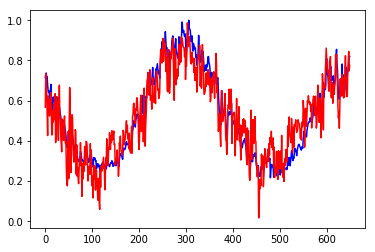

In [22]:
#Block of code to graph predictions


result =clf.predict(X_train)

#for i in X:
#    print(i)
#    result.append(regr.predict(i))
ran= 650
rang = np.arange(ran)


plt.figure(1)
plt.clf()
plt.plot(rang,Y[0:ran],'b')

plt.plot(rang,result[0:ran],'r')
plt.show()

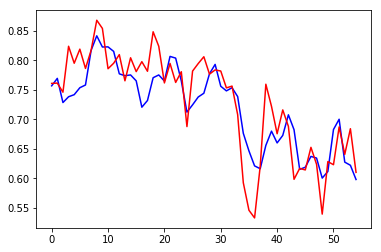

In [23]:
plt.figure(2)
Model_Result = clf.predict(X_valid)
ran= len(X_valid)
rang = np.arange(ran)

plt.figure(1)
plt.clf()
plt.plot(rang,Y_result,'b')

plt.plot(rang,Model_Result,'r')
plt.show()

In [24]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error([x*float(np.max(df["Demand"])) for x in Y_result],[x*float(np.max(df["Demand"])) for x in Model_Result])
print(mse)

2995.73670693


In [35]:
Real_Result = [x[0] for x in [k*float(np.max(df["Demand"])) for k in clf.predict(X_real)]]
print(type(Real_Result[0]))
for i in Real_Result:
    print(str(i)+"")

<class 'numpy.float32'>
867.537

704.42

674.485

700.527

738.994

806.03

722.325

658.0

696.988

644.365

761.485

821.748

748.342

832.054

866.592

820.626

763.456

677.575

611.205

580.62

561.724

717.511

782.234

708.351

771.934

843.595

834.52

881.188

892.472

679.684

709.183

569.474

598.251

416.83

374.091

479.601

668.029

402.985

398.04

494.372

439.367

436.161

749.882

557.935

503.965

514.068

436.399

440.809

556.305

413.115

400.166

454.675

468.098

552.911

677.795

669.4

606.711

515.854

595.556

554.072

621.449

652.294

589.977

523.42

424.354

375.817

295.843

209.355

411.502

306.965

574.541

598.128

528.49

573.85

423.642

541.493

608.849

592.273

496.689

388.244

319.62

317.346

234.684

216.852

338.865

412.661

400.025

401.593

467.366

517.454

460.414

424.428

511.877

445.574

386.022

400.952

438.623

341.246

324.028

372.266

312.424

377.631

454.005

460.535

402.872

365.659

245.256

362.645

177.433

-30.1382
